In [2]:
# Define custom order for cities
city_order = [
    'Karachi', 'Hyderabad', 'Sukkur', 'Larkana', 'Bahawalpur', 'Multan', 'Faisalabad', 'Islamabad', 
    'Rawalpindi', 'Lahore', 'Gujranwala', 'Sialkot', 'Peshawar', 'Quetta', 'Rahim Yar Khan', 'Jhang',
    'Sargodha', 'Abbottabad'
]

# Define edges based on given connections
edges = {
    'Abbottabad': ['Peshawar'],
    'Bahawalpur': ['Multan', 'Rahim Yar Khan'],
    'Faisalabad': ['Multan', 'Islamabad', 'Sargodha', 'Jhang', 'Gujranwala', 'Lahore'],
    'Gujranwala': ['Lahore', 'Sialkot', 'Faisalabad'],
    'Hyderabad': ['Karachi', 'Sukkur', 'Larkana'],
    'Islamabad': ['Rawalpindi', 'Lahore', 'Faisalabad'],
    'Jhang': ['Faisalabad', 'Sargodha'],
    'Karachi': ['Hyderabad', 'Sukkur'],
    'Lahore': ['Islamabad', 'Rawalpindi', 'Faisalabad', 'Sialkot', 'Gujranwala'],
    'Larkana': ['Sukkur', 'Hyderabad'],
    'Multan': ['Bahawalpur', 'Faisalabad'],
    'Peshawar': ['Rawalpindi', 'Abbottabad'],
    'Quetta': ['Sukkur', 'Rahim Yar Khan'],
    'Rahim Yar Khan': ['Quetta', 'Bahawalpur'],
    'Rawalpindi': ['Islamabad', 'Lahore', 'Peshawar'],
    'Sargodha': ['Faisalabad', 'Jhang'],
    'Sialkot': ['Gujranwala', 'Lahore'],
    'Sukkur': ['Hyderabad', 'Karachi', 'Larkana']
}


# Define path costs based on approximate distances in kilometers
path_costs = {
    ('Abbottabad', 'Peshawar') : 198,
    ('Bahawalpur', 'Multan') : 99,
    ('Bahawalpur', 'Rahim Yar Khan') : 211,
    ('Faisalabad', 'Multan') : 249,
    ('Faisalabad', 'Islamabad') : 320,
    ('Faisalabad', 'Sargodha') : 91,
    ('Faisalabad', 'Jhang') : 93,
    ('Faisalabad', 'Gujranwala') : 186,
    ('Faisalabad', 'Lahore') : 90,
    ('Gujranwala', 'Lahore') : 80,
    ('Gujranwala', 'Sialkot') : 52,
    ('Hyderabad', 'Larkana') : 315,
    ('Hyderabad', 'Sukkur') : 334,
    ('Islamabad', 'Lahore') : 377,
    ('Islamabad', 'Rawalpindi') : 23,
    ('Jhang', 'Sargodha') : 122,
    ('Karachi', 'Hyderabad') : 80,
    ('Karachi', 'Sukkur') : 474,
    ('Lahore', 'Rawalpindi') : 361,
    ('Lahore', 'Sialkot') : 132,
    ('Larkana', 'Sukkur') : 83,
    ('Peshawar', 'Rawalpindi') : 188,
    ('Quetta', 'Sukkur') : 386,
    ('Quetta', 'Rahim Yar Khan') : 552,
}


# City coordinates dictionary
cities = {
    'Karachi': (24.8607, 67.0011),
    'Hyderabad': (25.3969, 68.3772),
    'Sukkur': (27.7138, 68.8304),
    'Larkana': (27.5609, 68.2268),
    'Bahawalpur': (29.3717, 71.7112),
    'Multan': (30.1575, 71.5249),
    'Faisalabad': (31.4504, 73.135),
    'Islamabad': (33.6844, 73.0479),
    'Rawalpindi': (33.5651, 73.0169),
    'Lahore': (31.5497, 74.3436),
    'Gujranwala': (32.1877, 74.1949),
    'Sialkot': (32.4945, 74.5229),
    'Peshawar': (34.0151, 71.5249),
    'Quetta': (30.1798, 66.975),
    'Rahim Yar Khan': (28.4202, 70.2957),
    'Jhang': (31.2749, 72.3187),
    'Sargodha': (32.0836, 72.6711),
    'Abbottabad': (34.1546, 73.2493)
}

# Define the graph representing the connections between cities
graph = {
    'Abbottabad': {'Peshawar': 198},
    'Bahawalpur': {'Multan': 99, 'Rahim Yar Khan': 211},
    'Faisalabad': {'Multan': 249, 'Islamabad': 320, 'Sargodha': 91, 'Jhang': 93, 'Gujranwala': 186, 'Lahore': 90},
    'Gujranwala': {'Lahore': 80, 'Sialkot': 52, 'Faisalabad': 186},
    'Hyderabad': {'Karachi': 80, 'Sukkur': 334, 'Larkana': 315},
    'Islamabad': {'Rawalpindi': 23, 'Lahore': 377, 'Faisalabad': 320},
    'Jhang': {'Faisalabad': 93, 'Sargodha': 122},
    'Karachi': {'Hyderabad': 80, 'Sukkur': 474},
    'Lahore': {'Islamabad': 377, 'Rawalpindi': 361, 'Faisalabad': 90, 'Sialkot': 132, 'Gujranwala': 80},
    'Larkana': {'Sukkur': 83, 'Hyderabad': 315},
    'Multan': {'Bahawalpur': 99, 'Faisalabad': 249},
    'Peshawar': {'Rawalpindi': 188, 'Abbottabad': 198},
    'Quetta': {'Sukkur': 386, 'Rahim Yar Khan': 552},
    'Rahim Yar Khan': {'Quetta': 552, 'Bahawalpur': 211},
    'Rawalpindi': {'Islamabad': 23, 'Lahore': 361, 'Peshawar': 188},
    'Sargodha': {'Faisalabad': 91, 'Jhang': 122},
    'Sialkot': {'Gujranwala': 52, 'Lahore': 132},
    'Sukkur': {'Hyderabad': 334, 'Karachi': 474, 'Larkana': 83, 'Quetta': 386}
}



In [3]:
# Heuristics Data

# Define the heuristic values (straight-line distances between cities)
heuristic_values = {
    'Karachi': {
        'Hyderabad': 76,
        'Sukkur': 399,
        'Larkana': 347,
        'Bahawalpur': 1501,
        'Multan': 1623,
        'Faisalabad': 1900,
        'Islamabad': 2230,
        'Rawalpindi': 2232,
        'Lahore': 2000,
        'Gujranwala': 2071,
        'Sialkot': 2113,
        'Peshawar': 2410,
        'Quetta': 784,
        'Rahim Yar Khan': 1341,
        'Jhang': 2002,
        'Sargodha': 2001,
        'Abbottabad': 2510,
        'Karachi': 0
    },

    'Hyderabad': {
        'Karachi': 76,
        'Sukkur': 331,
        'Larkana': 310,
        'Bahawalpur': 1478,
        'Multan': 1573,
        'Faisalabad': 1829,
        'Islamabad': 2145,
        'Rawalpindi': 2172,
        'Lahore': 1919,
        'Gujranwala': 1998,
        'Sialkot': 2035,
        'Peshawar': 2330,
        'Quetta': 716,
        'Rahim Yar Khan': 1264,
        'Jhang': 1917,
        'Sargodha': 1913,
        'Abbottabad': 2430,
        'Hyderabad': 0
    },

    'Sukkur': {
        'Karachi': 399,
        'Hyderabad': 331,
        'Larkana': 80,
        'Bahawalpur': 1140,
        'Multan': 1228,
        'Faisalabad': 1437,
        'Islamabad': 1800,
        'Rawalpindi': 1810,
        'Lahore': 1507,
        'Gujranwala': 1627,
        'Sialkot': 1710,
        'Peshawar': 2008,
        'Quetta': 336,
        'Rahim Yar Khan': 908,
        'Jhang': 1500,
        'Sargodha': 1548,
        'Abbottabad': 2206,
        'Sukkur': 0
    },

    'Larkana': {
        'Karachi': 347,
        'Hyderabad': 310,
        'Sukkur': 80,
        'Bahawalpur': 1202,
        'Multan': 1321,
        'Faisalabad': 1530,
        'Islamabad': 1820,
        'Rawalpindi': 1753,
        'Lahore': 1640,
        'Gujranwala': 1730,
        'Sialkot': 1782,
        'Peshawar': 2001,
        'Quetta': 454,
        'Rahim Yar Khan': 1001,
        'Jhang': 1643,
        'Sargodha': 1571,
        'Abbottabad': 2280,
        'Larkana': 0
    },

    'Bahawalpur': {
        'Karachi': 1501,
        'Hyderabad': 1478,
        'Sukkur': 1140,
        'Larkana': 1202,
        'Multan': 97,
        'Faisalabad': 338,
        'Islamabad': 662,
        'Rawalpindi': 660,
        'Lahore': 433,
        'Gujranwala': 511,
        'Sialkot': 560,
        'Peshawar': 839,
        'Quetta': 758,
        'Rahim Yar Khan': 203,
        'Jhang': 432,
        'Sargodha': 435,
        'Abbottabad': 1076,
        'Bahawalpur': 0
    },

    'Multan': {
        'Karachi': 1623,
        'Hyderabad': 1573,
        'Sukkur': 1228,
        'Larkana': 1321,
        'Bahawalpur': 97,
        'Faisalabad': 239,
        'Islamabad': 529,
        'Rawalpindi': 502,
        'Lahore': 319,
        'Gujranwala': 409,
        'Sialkot': 470,
        'Peshawar': 750,
        'Quetta': 822,
        'Rahim Yar Khan': 302,
        'Jhang': 340,
        'Sargodha': 320,
        'Abbottabad': 938,
        'Multan': 0
    },

    'Faisalabad': {
        'Karachi': 1900,
        'Hyderabad': 1829,
        'Sukkur': 1437,
        'Larkana': 1530,
        'Bahawalpur': 338,
        'Multan': 238,
        'Islamabad': 317,
        'Rawalpindi': 333,
        'Lahore': 86,
        'Gujranwala': 165,
        'Sialkot': 222,
        'Peshawar': 524,
        'Quetta': 1111,
        'Rahim Yar Khan': 555,
        'Jhang': 90,
        'Sargodha': 84,
        'Abbottabad': 717,
        'Faisalabad': 0
    },

    'Islamabad': {
        'Karachi': 2230,
        'Hyderabad': 2145,
        'Sukkur': 1800,
        'Larkana': 1820,
        'Bahawalpur': 662,
        'Multan': 529,
        'Faisalabad': 314,
        'Rawalpindi': 20,
        'Lahore': 371,
        'Gujranwala': 455,
        'Sialkot': 503,
        'Peshawar': 210,
        'Quetta': 1430,
        'Rahim Yar Khan': 879,
        'Jhang': 411,
        'Sargodha': 401,
        'Abbottabad': 403,
        'Islamabad': 0
    },

    'Rawalpindi': {
        'Karachi': 2230,
        'Hyderabad': 2172,
        'Sukkur': 1810,
        'Larkana': 1753,
        'Bahawalpur': 660,
        'Multan': 502,
        'Faisalabad': 333,
        'Islamabad': 20,
        'Lahore': 331,
        'Gujranwala': 401,
        'Sialkot': 433,
        'Peshawar': 178,
        'Quetta': 1404,
        'Rahim Yar Khan': 900,
        'Jhang': 430,
        'Sargodha': 432,
        'Abbottabad': 380,
        'Rawalpindi': 0
    },

    'Lahore': {
        'Karachi': 2000,
        'Hyderabad': 1919,
        'Sukkur': 1507,
        'Larkana': 1640,
        'Bahawalpur': 433,
        'Multan': 319,
        'Faisalabad': 86,
        'Islamabad': 371,
        'Rawalpindi': 331,
        'Gujranwala': 71,
        'Sialkot': 130,
        'Peshawar': 542,
        'Quetta': 1200,
        'Rahim Yar Khan': 645,
        'Jhang': 180,
        'Sargodha': 173,
        'Abbottabad': 746,
        'Lahore': 0
    },

    'Gujranwala': {
        'Karachi': 2071,
        'Hyderabad': 1998,
        'Sukkur': 1627,
        'Larkana': 1730,
        'Bahawalpur': 511,
        'Multan': 409,
        'Faisalabad': 165,
        'Islamabad': 455,
        'Rawalpindi': 401,
        'Lahore': 71,
        'Sialkot': 47,
        'Peshawar': 621,
        'Quetta': 1277,
        'Rahim Yar Khan': 720,
        'Jhang': 258,
        'Sargodha': 259,
        'Abbottabad': 821,
        'Gujranwala': 0
    },

    'Sialkot': {
        'Karachi': 2113,
        'Hyderabad': 2035,
        'Sukkur': 1710,
        'Larkana': 1782,
        'Bahawalpur': 560,
        'Multan': 470,
        'Faisalabad': 222,
        'Islamabad': 503,
        'Rawalpindi': 433,
        'Lahore': 130,
        'Gujranwala': 47,
        'Peshawar': 645,
        'Quetta': 1223,
        'Rahim Yar Khan': 725,
        'Jhang': 302,
        'Sargodha': 304,
        'Abbottabad': 829,
        'Sialkot': 0
    },

    'Peshawar': {
        'Karachi': 2410,
        'Hyderabad': 2330,
        'Sukkur': 2008,
        'Larkana': 2001,
        'Bahawalpur': 839,
        'Multan': 750,
        'Faisalabad': 524,
        'Islamabad': 210,
        'Rawalpindi': 178,
        'Lahore': 542,
        'Gujranwala': 621,
        'Sialkot': 645,
        'Quetta': 1552,
        'Rahim Yar Khan': 1037,
        'Jhang': 613,
        'Sargodha': 612,
        'Abbottabad': 178,
        'Peshawar': 0
    },

    'Quetta': {
        'Karachi': 784,
        'Hyderabad': 716,
        'Sukkur': 336,
        'Larkana': 454,
        'Bahawalpur': 758,
        'Multan': 822,
        'Faisalabad': 1111,
        'Islamabad': 1430,
        'Rawalpindi': 1404,
        'Lahore': 1200,
        'Gujranwala': 1277,
        'Sialkot': 1223,
        'Peshawar': 1552,
        'Rahim Yar Khan': 432,
        'Jhang': 1094,
        'Sargodha': 1132,
        'Abbottabad': 1234,
        'Quetta': 0
    },

    'Rahim Yar Khan': {
        'Karachi': 1341,
        'Hyderabad': 1264,
        'Sukkur': 980,
        'Larkana': 1001,
        'Bahawalpur': 203,
        'Multan': 302,
        'Faisalabad': 555,
        'Islamabad': 879,
        'Rawalpindi': 900,
        'Lahore': 645,
        'Gujranwala': 720,
        'Sialkot': 725,
        'Peshawar': 1037,
        'Quetta': 432,
        'Jhang': 638,
        'Sargodha': 610,
        'Abbottabad': 1148,
        'Rahim Yar Khan': 0
    },

    'Jhang': {
        'Karachi': 2002,
        'Hyderabad': 1917,
        'Sukkur': 1500,
        'Larkana': 1643,
        'Bahawalpur': 432,
        'Multan': 340,
        'Faisalabad': 90,
        'Islamabad': 411,
        'Rawalpindi': 403,
        'Lahore': 180,
        'Gujranwala': 258,
        'Sialkot': 302,
        'Peshawar': 613,
        'Quetta': 1094,
        'Rahim Yar Khan': 638,
        'Sargodha': 115,
        'Abbottabad': 816,
        'Jhang': 0
    },

    'Sargodha': {
        'Karachi': 2001,
        'Hyderabad': 1913,
        'Sukkur': 1548,
        'Larkana': 1571,
        'Bahawalpur': 435,
        'Multan': 320,
        'Faisalabad': 84,
        'Islamabad': 401,
        'Rawalpindi': 432,
        'Lahore': 173,
        'Gujranwala': 259,
        'Sialkot': 304,
        'Peshawar': 612,
        'Quetta': 1132,
        'Rahim Yar Khan': 610,
        'Jhang': 115,
        'Abbottabad': 810,
        'Sargodha': 0
    },

    'Abbottabad': {
        'Karachi': 2510,
        'Hyderabad': 2430,
        'Sukkur': 2206,
        'Larkana': 2280,
        'Bahawalpur': 1076,
        'Multan': 938,
        'Faisalabad': 717,
        'Islamabad': 403,
        'Rawalpindi': 380,
        'Lahore': 746,
        'Gujranwala': 821,
        'Sialkot': 829,
        'Peshawar': 178,
        'Quetta': 1132,
        'Rahim Yar Khan': 1148,
        'Jhang': 816,
        'Sargodha': 810,
        'Abbottabad': 0
    }
}

In [4]:
# A* Star Search Implementation

import heapq

def astar(graph, heuristic_values, start, goal):
    print(f'\nA* Search Working ...\n')
    
    # Priority queue to store nodes yet to be explored
    frontier = []
    heapq.heappush(frontier, (0, start))  # (estimated_cost, node)

    # Dictionary to keep track of the path, its total cost, and the previous node
    path_cost = {start: (0, None)}  # (total_cost, predecessor)

    while frontier:
        # Get the node with the minimum estimated total cost
        estimated_cost, current_node = heapq.heappop(frontier)

        print(f'Current Node: {current_node}')
        # If the current node is the goal, return the path
        if current_node == goal:
            print(f'-------------Reached GOAL City: {current_node}-------------')
            # Reconstruct the path
            path = []
            total_cost = path_cost[current_node][0]
            while current_node is not None:
                path.append(current_node)
                current_node = path_cost[current_node][1]
            path.reverse()
            return path, total_cost
        
        
        # Print the current node and its neighbors with total costs
        #print(f'Current Node: {current_node}')
        print('Neighbors:')
        for neighbor, distance in graph[current_node].items():
            # Calculate the total cost to reach the neighbor via the current node
            total_cost = path_cost[current_node][0] + distance
            # Calculate the estimated total cost from the neighbor to the goal
            estimated_total_cost = total_cost + heuristic_values[neighbor][goal]
            if current_node != goal:
                print(f'    {neighbor}: Path Cost: {total_cost} + Heuristic: {heuristic_values[neighbor][goal]} = {estimated_total_cost}')

        

        # Explore neighbors of the current node
        for neighbor, distance in graph[current_node].items():
            # Calculate the total cost to reach the neighbor via the current node
            total_cost = path_cost[current_node][0] + distance

            # If the neighbor hasn't been visited or this path is shorter than previous paths
            if neighbor not in path_cost or total_cost < path_cost[neighbor][0]:
                # Update the path and its cost
                path_cost[neighbor] = (total_cost, current_node)

                # Calculate the estimated total cost from the neighbor to the goal
                estimated_total_cost = total_cost + heuristic_values[neighbor][goal]

                # Add the neighbor to the frontier
                heapq.heappush(frontier, (estimated_total_cost, neighbor))

    return None, float('inf')

Cities of Pakistan:
Karachi
Hyderabad
Sukkur
Larkana
Bahawalpur
Multan
Faisalabad
Islamabad
Rawalpindi
Lahore
Gujranwala
Sialkot
Peshawar
Quetta
Rahim Yar Khan
Jhang
Sargodha
Abbottabad

Enter the start city: Larkana
Enter the goal city: Rahim Yar Khan

Heuristics to Rahim Yar Khan:
Karachi = 1341
Hyderabad = 1264
Sukkur = 980
Larkana = 1001
Bahawalpur = 203
Multan = 302
Faisalabad = 555
Islamabad = 879
Rawalpindi = 900
Lahore = 645
Gujranwala = 720
Sialkot = 725
Peshawar = 1037
Quetta = 432
Jhang = 638
Sargodha = 610
Abbottabad = 1148
Rahim Yar Khan = 0

A* Search Working ...

Current Node: Larkana
Neighbors:
    Sukkur: Path Cost: 83 + Heuristic: 908 = 991
    Hyderabad: Path Cost: 315 + Heuristic: 1264 = 1579
Current Node: Sukkur
Neighbors:
    Hyderabad: Path Cost: 417 + Heuristic: 1264 = 1681
    Karachi: Path Cost: 557 + Heuristic: 1341 = 1898
    Larkana: Path Cost: 166 + Heuristic: 1001 = 1167
    Quetta: Path Cost: 469 + Heuristic: 432 = 901
Current Node: Quetta
Neighbors:
   

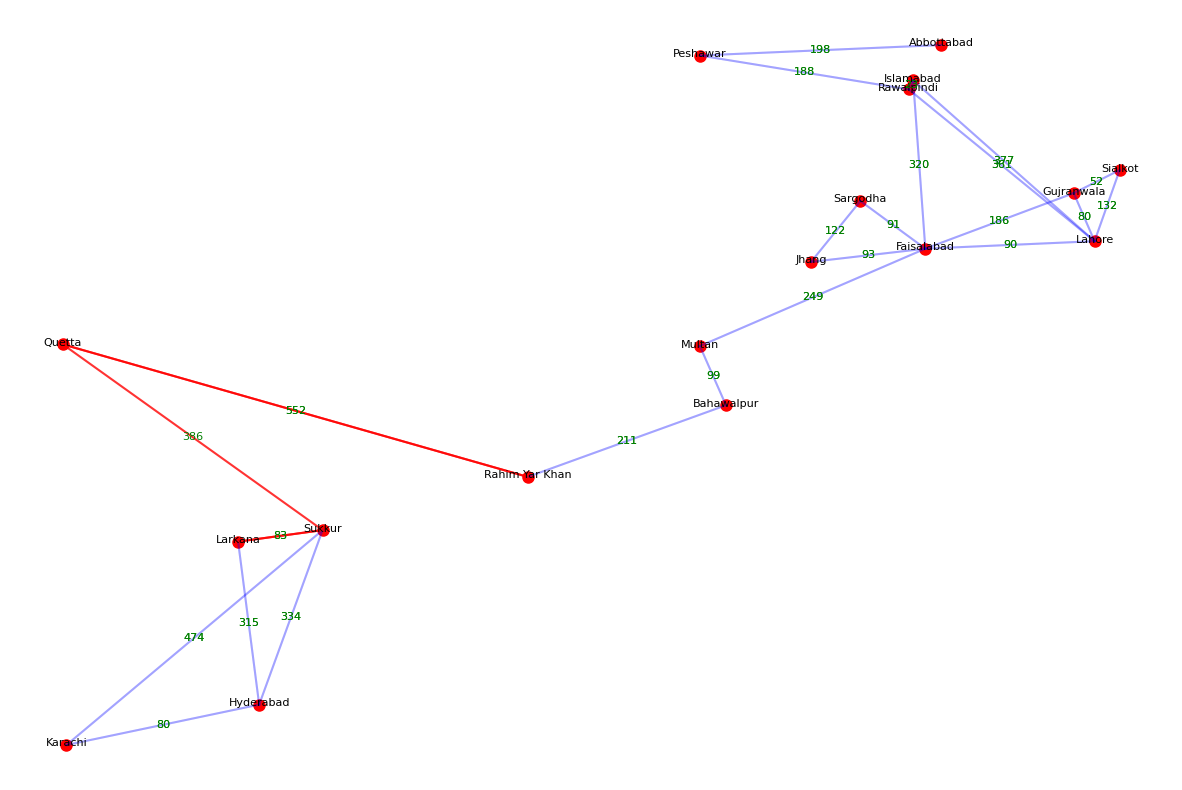


Total cost: 1021


In [9]:
# Print cities
print("Cities of Pakistan:")
for i in city_order:
    print(i)

start_city = input("\nEnter the start city: ").strip()
goal_city = input("Enter the goal city: ").strip()

# Print Heuristics to goal city
print('\033[1m' + f'\nHeuristics to {goal_city}:' + '\033[0m')
for city, h in  heuristic_values[goal_city].items():
    print(f'{city} = {h}')

path, total_cost = astar(graph, heuristic_values, start_city, goal_city)

# Graph Plotting
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(15, 10))

# Draw nodes
for city in city_order:
    coords = cities[city]
    plt.plot(coords[1], coords[0], 'ro', markersize=8)
    plt.text(coords[1], coords[0] + 0.02, city, ha='center', va='center', fontsize=8)

# Draw edges
for city, neighbors in edges.items():
    start_coords = cities[city]
    for neighbor in neighbors:
        end_coords = cities[neighbor]
        edge_color = 'b-'  # Default edge color
        ALPHA =0.2   # Increasing opacity
        # Check if the edge is part of the best path
        if (city in path and neighbor in path and path.index(city) == path.index(neighbor) - 1) or (neighbor in path and city in path and path.index(neighbor) == path.index(city) - 1):
            edge_color = '#FF0000'  # Highlight edge color
            ALPHA =0.8   # Increasing opacity
        plt.plot([start_coords[1], end_coords[1]], [start_coords[0], end_coords[0]], edge_color, alpha=ALPHA)
        # Calculate the midpoint for placing the text
        mid_x = (start_coords[1] + end_coords[1]) / 2
        mid_y = (start_coords[0] + end_coords[0]) / 2
        # Get the path cost
        cost = path_costs.get((city, neighbor), path_costs.get((neighbor, city), None))
        if cost is not None:
            plt.text(mid_x, mid_y, str(cost), fontsize=8, color='green', ha='center', va='center')


plt.axis('off')
plt.show()


if path:
    #print("\nOptimal Path from", start_city, "to", goal_city, ":\n", path)
    print("\nTotal cost:", total_cost)
else:
    print("No path found from", start_city, "to", goal_city)
